# Groupby operations

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Recap: the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [3]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [4]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


Pandas does not only let you group by a column name. In `df.groupby(grouper)` can be many things:

- Series (or string indicating a column in df)
- function (to be applied on the index)
- dict : groups by values
- levels=[], names of levels in a MultiIndex



In [8]:
df.groupby(lambda x: x % 2).mean()

,data
0,10
1,10


## And now applying this on some real data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so all credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the film
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [204]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [258]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), plot the number of films that have been released each decade in the history of cinema.
</div>

<AxesSubplot:xlabel='year'>

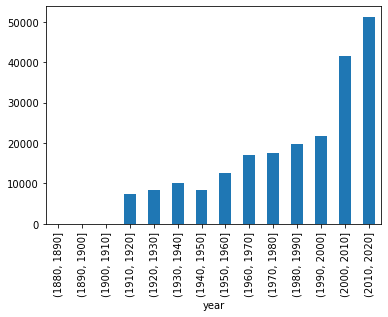

In [181]:
# %load snippets/04b - Advanced groupby operations8.py
tit = titles.sort_values('year')
bins =  np.arange(1880,2030, 10)
ind = pd.cut(tit['year'], bins)
tit['title'].groupby(ind).count().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to plot the number of "Hamlet" films made each decade.
</div>

In [66]:
# %load snippets/04b - Advanced groupby operations9.py
tit_H=tit[tit['title']=='Hamlet']
max_H=tit_H['year'].max()
min_H=tit_H['year'].min()
print (min_H, max_H) 

1910 2016


<AxesSubplot:xlabel='year'>

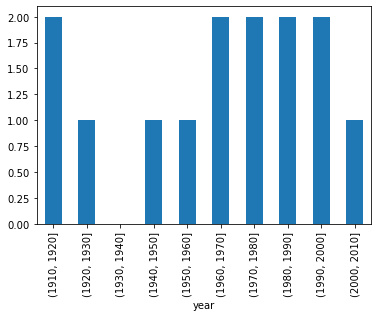

In [71]:
bins_H =  np.arange(min_H, max_H, 10)
ind_H = pd.cut(tit_H['year'], bins_H)
tit_H['title'].groupby(ind_H).count().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
</div>

In [91]:
# %load snippets/04b - Advanced groupby operations10.py
s1950=cast[(cast['year']>=1950) & (cast['year']<1960)]
leading_1950=s1950[s1950['n']==1]
m=leading_1950[leading_1950['type']=='actor']
f=leading_1950[leading_1950['type']=='actress']
print (m.groupby('year')['n'].count())
print (f.groupby('year')['n'].count())

year
1950    604
1951    633
1952    591
1953    634
1954    626
1955    606
1956    614
1957    708
1958    694
1959    678
Name: n, dtype: int64
year
1950    271
1951    272
1952    284
1953    290
1954    298
1955    264
1956    288
1957    284
1958    275
1959    287
Name: n, dtype: int64


<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.
</div>

In [123]:
# %load snippets/04b - Advanced groupby operations11.py
s1990=cast[cast['year']>=1990]
leading=s1990[s1990['n']==1]
n_lead=actor.groupby('name').count()
n_lead.sort_values('n' , ascending=False )['n'].head(10)


name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Amitabh Bachchan       68
Eric Roberts           68
Nagarjuna Akkineni     60
Dilip                  59
Name: n, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Use groupby() to determine how many roles are listed for each of The Pink Panther movies.
</div>

In [134]:
# %load snippets/04b - Advanced groupby operations12.py
PP=cast[cast['title']=='The Pink Panther']
PP.groupby('year')['type'].count()

year
1963    19
2006    89
Name: type, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List, in order by year, each of the films in which Frank Oz has played more than 1 role.
</div>

In [175]:
# %load snippets/04b - Advanced groupby operations13.py
cast2=cast.sort_values('year')
FO=cast2[cast2['name']=='Frank Oz']
F02=FO.groupby(['title', 'year']).aggregate('character').count()
F02[F02>2]

title                                     year
Muppet Treasure Island                    1996    4
Muppets from Space                        1999    4
Sesame Street Presents: Follow that Bird  1985    3
The Adventures of Elmo in Grouchland      1999    3
The Great Muppet Caper                    1981    6
The Muppet Christmas Carol                1992    7
The Muppet Movie                          1979    8
The Muppets Take Manhattan                1984    7
Name: character, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: List each of the characters that Frank Oz has portrayed at least twice.
</div>

In [165]:
# %load snippets/04b - Advanced groupby operations15.py
cha=FO.groupby('character')['n'].count() 
cha[cha > 2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Miss Piggy        6
Sam the Eagle     5
Yoda              5
Name: n, dtype: int64

## Transforms

Sometimes you don't want to aggregate the groups, but transform the values in each group. This can be achieved with `transform`:

In [182]:
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


In [183]:
df.groupby('key').transform('mean')

,data
0,5
1,10
2,15
3,5
4,10
5,15
6,5
7,10
8,15


In [184]:
def normalize(group):
    return (group - group.mean()) / group.std()

In [186]:
df.groupby('key').transform(normalize)

,data
0,-1.0
1,-1.0
2,-1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0


In [187]:
df.groupby('key').transform('sum')

,data
0,15
1,30
2,45
3,15
4,30
5,45
6,15
7,30
8,45


<div class="alert alert-success">
    <b>EXERCISE</b>: Add a column to the `cast` dataframe that indicates the number of roles for the film.
</div>

In [195]:
# %load snippets/04b - Advanced groupby operations21.py
role=cast.groupby('title').aggregate('character').transform('count')
cast['num of role']=role
cast.head()

,title,year,name,type,character,n,num of role
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,24
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,24
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,47
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,34
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,34


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the ratio of leading actor and actress roles to the total number of leading roles per decade.     
</div>

Tip: you can to do a groupby twice in two steps,  once calculating the numbers, and then the ratios.

In [236]:
# %load snippets/04b - Advanced groupby operations22.py
c = cast.sort_values('year')

n1_for_year=c[c['n']==1].groupby('year').count()
n1_for_year

Int64Index([1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
            ...
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020],
           dtype='int64', name='year', length=114)

In [320]:
# %load snippets/04b - Advanced groupby operations23.py
bins =  np.arange(1890,2030, 10)
ind = pd.cut(n1_for_year.index, bins)
n1_for_decade=n1_for_year['n'].groupby(ind).sum()
n1_for_decade

(1890, 1900]        0
(1900, 1910]       11
(1910, 1920]     6109
(1920, 1930]     7271
(1930, 1940]     9026
                ...  
(1970, 1980]    11357
(1980, 1990]    12571
(1990, 2000]    15062
(2000, 2010]    27062
(2010, 2020]    21119
Name: n, Length: 13, dtype: int64

In [242]:
# %load snippets/04b - Advanced groupby operations24.py
tot=n1_for_decade.sum()
n1_for_decade / tot

(1890, 1900]    0.000000
(1900, 1910]    0.000080
(1910, 1920]    0.044464
(1920, 1930]    0.052922
(1930, 1940]    0.065695
                  ...   
(1970, 1980]    0.082661
(1980, 1990]    0.091497
(1990, 2000]    0.109628
(2000, 2010]    0.196969
(2010, 2020]    0.153713
Name: n, Length: 13, dtype: float64

## Intermezzo: string manipulations

Python strings have a lot of useful methods available to manipulate or check the content of the string:

In [243]:
s = 'Bradwurst'

In [244]:
s.startswith('B')

True

In pandas, those methods (together with some additional methods) are also available for string Series through the `.str` accessor:

In [245]:
s = pd.Series(['Bradwurst', 'Kartoffelsalat', 'Sauerkraut'])

In [246]:
s.str.startswith('B')

0     True
1    False
2    False
dtype: bool

For an overview of all string methods, see: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

<div class="alert alert-success">
    <b>EXERCISE</b>: We already plotted the number of 'Hamlet' films released each decade, but not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet', and that start with 'Hamlet':
</div>

In [250]:
# %load snippets/04b - Advanced groupby operations29.py
Hamlet2=titles[titles['title'].str.contains('Hamlet')]
max_H2=Hamlet2['year'].max()
min_H2=Hamlet2['year'].min()
print (min_H2, max_H2) 

1910 2016


<AxesSubplot:xlabel='year'>

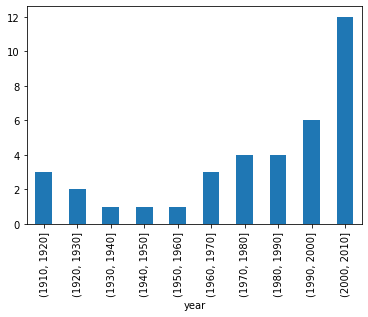

In [254]:
# %load snippets/04b - Advanced groupby operations30.py
bins_H2 =  np.arange(min_H2, max_H2, 10)
ind_H2 = pd.cut(Hamlet2['year'], bins_H2)
Hamlet2['title'].groupby(ind_H2).count().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: List the 10 movie titles with the longest name.
</div>

In [ ]:
# %load snippets/04b - Advanced groupby operations31.py

In [ ]:
# %load snippets/04b - Advanced groupby operations32.py

## Value counts

A useful shortcut to calculate the number of occurences of certain values is `value_counts` (this is somewhat equivalent to `df.groupby(key).size())`)

For example, what are the most occuring movie titles?

In [255]:
titles.title.value_counts().head()

Hamlet                  19
Macbeth                 14
Carmen                  14
The Three Musketeers    12
The Outsider            11
Name: title, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which years saw the most films released?
</div>

In [272]:
# %load snippets/04b - Advanced groupby operations34.py
y=titles.groupby('year').count()
y.sort_values('title', ascending=False).head(10)

,title
year,
2015,13978
2014,8209
2013,7664
2012,7273
2011,6844
2010,6278
2009,5985
2016,5621
2008,4953


<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of released films over time
</div>

<AxesSubplot:xlabel='year'>

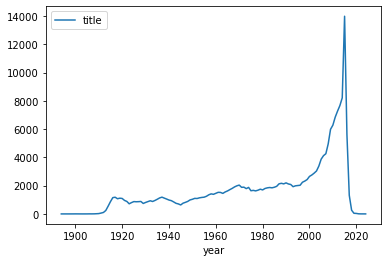

In [274]:
# %load snippets/04b - Advanced groupby operations35.py
titles.groupby('year').count().plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of "Hamlet" films made each decade.
</div>

<AxesSubplot:xlabel='year'>

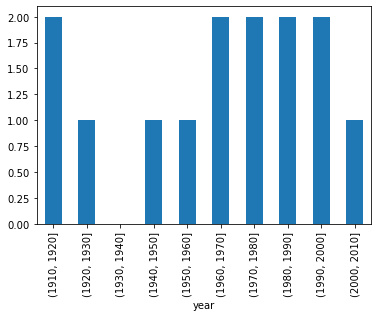

In [275]:
# %load snippets/04b - Advanced groupby operations36.py
tit_H=tit[tit['title']=='Hamlet']
max_H=tit_H['year'].max()
min_H=tit_H['year'].min()
bins_H =  np.arange(min_H, max_H, 10)
ind_H = pd.cut(tit_H['year'], bins_H)
tit_H['title'].groupby(ind_H).count().plot(kind='bar')



<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 11 most common character names in movie history?
</div>

In [283]:
# %load snippets/04b - Advanced groupby operations37.py
z=cast.groupby('character')['title'].count()
z.sort_values(ascending=False).head(11)

character
Himself        18928
Dancer         11070
Extra           9141
Reporter        7646
Doctor          6846
               ...  
Student         6406
Bartender       6178
Nurse           6164
Party Guest     5917
Minor Role      5880
Name: title, Length: 11, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Which actors or actresses appeared in the most movies in the year 2010?
</div>

In [288]:
# %load snippets/04b - Advanced groupby operations38.py
year2010=cast[cast['year']==2010]
act2010=year2010.groupby('name')['title'].count()
act2010.sort_values(ascending=False)

name
Lloyd Kaufman           23
Suraaj Venjarammoodu    20
Jagathi Sreekumar       20
Chris (II) Eddy         20
Matt Simpson Siegel     17
                        ..
Mauro Chetoni            1
Mauro Dittami            1
Mauro Mu?iz              1
Mauro Ursella            1
$2 Tony                  1
Name: title, Length: 93771, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot how many roles Brad Pitt has played in each year of his career.
</div>

<AxesSubplot:xlabel='year'>

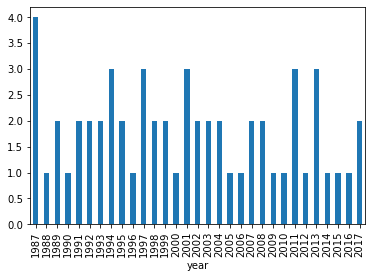

In [292]:
# %load snippets/04b - Advanced groupby operations39.py
BP=cast[cast['name']=='Brad Pitt']
BP.groupby('year')['title'].count().plot(kind='bar')

<div class="alert alert-success">
    <b>EXERCISE</b>: What are the 10 most film titles roles that start with the word "The Life"?
</div>

In [319]:
# %load snippets/04b - Advanced groupby operations40.py
TL=cast[cast['title'].str.startswith('The Life')]
TL1=TL.groupby('title')['character'].count()
TL2=TL.groupby('title').aggregate('character').count()
TL1.sort_values(ascending=False).head(10)


title
The Life                              15
The Life After                        13
The Life Aquatic with Steve Zissou    78
The Life Before Her Eyes              74
The Life Before This                  41
                                      ..
The Life of the Party                 45
The Lifeguard                         36
The Lifeguardsman                     13
The Lifehouse Concert                 12
The Lifetaker                          3
Name: character, Length: 51, dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?
</div>

In [315]:
# %load snippets/04b - Advanced groupby operations41.py
m=cast[cast['type']=='actor']

m1950=m[(m['year']>=1950) & (m['year']<2000)]
m2000=m[m['year']>=2000]

a=m1950[m1950['n']==1]['n'].count()
print ("lenading roles available to actor in the 1950s are " + str(a))

b=m2000[m2000['n']==1]['n'].count()
print ("lenading roles available to actor in the 2000s are " + str(b))

lenading roles available to actor in the 1950s is 41780
lenading roles available to actor in the 2000s is 35237


In [ ]:
# %load snippets/04b - Advanced groupby operations42.py

In [316]:
f=cast[cast['type']=='actress']
f1950=f[(f['year']>=1950) & (f['year']<2000)]
f2000=f[f['year']>=2000]

c=f1950[f1950['n']==1]['n'].count()
print ("lenading roles available to actress in the 1950s are " + str(c))

d=f2000[f2000['n']==1]['n'].count()
print ("lenading roles available to actress in the 2000s are " + str(d))

lenading roles available to actress in the 1950s are 16491
lenading roles available to actress in the 2000s are 14922
